In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import gensim
import re
import tensorflow as tf
import xgboost as xgb

# Importing Datasets #

In [2]:
dataset=pd.read_csv("D:\Research Task 2\Depressive Tendencies Task Datasets - train.csv")
test_dataset=pd.read_csv("D:\Research Task 2\Depressive Tendencies Task Datasets - test.csv")

In [3]:
dataset.head()

,tweet_id,user_id,tweet_text,followers_count,following_count,tweet_count,listed_count,hashtags,mentions,user_description,retweet_count,reply_count,like_count,quote_count,created_at,label
0,1.540000e+18,1.380000e+18,i hate my life https://t.co/iKqwlA23ft,605,474,6715,6,0,0,i believe in pixy and kingdom supremacy,33,7,123,10,2022-06-15 06:45:26+00:00,1
1,1.540000e+18,1.380000e+18,"There are notable differences between us, but ...",5,1,23148,0,0,0,bot made by @GNCbinary ! I am programmed to re...,0,0,0,0,2022-06-19 03:15:47+00:00,0
2,1.540000e+18,8.050000e+17,I keep having this reoccurring bad dream. It a...,4324,4987,3039,30,0,0,author | rep. @MaximusLiterary |\nomnist | Pan...,1,1,8,0,2022-06-17 14:38:49+00:00,1
3,1.540000e+18,1.380000e+18,I dont want to make yall think im seeking for ...,7,56,995,0,0,0,loving #StrayKids is undeniable \n👁️👄👁️,0,1,0,0,2022-06-14 18:32:30+00:00,1
4,1.540000e+18,1.420000e+18,@Andyb56 @ashlea_robyn People like you dont de...,2918,4967,10043,3,0,1,I am a happy-go-lucky kind of man. Happy to ch...,0,0,3,0,2022-06-18 19:01:59+00:00,0


# Checking Correlation and other visualisations #

C:\Users\Aayush\AppData\Local\Temp\ipykernel_39972\1066660842.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(),annot=True)


<Axes: >

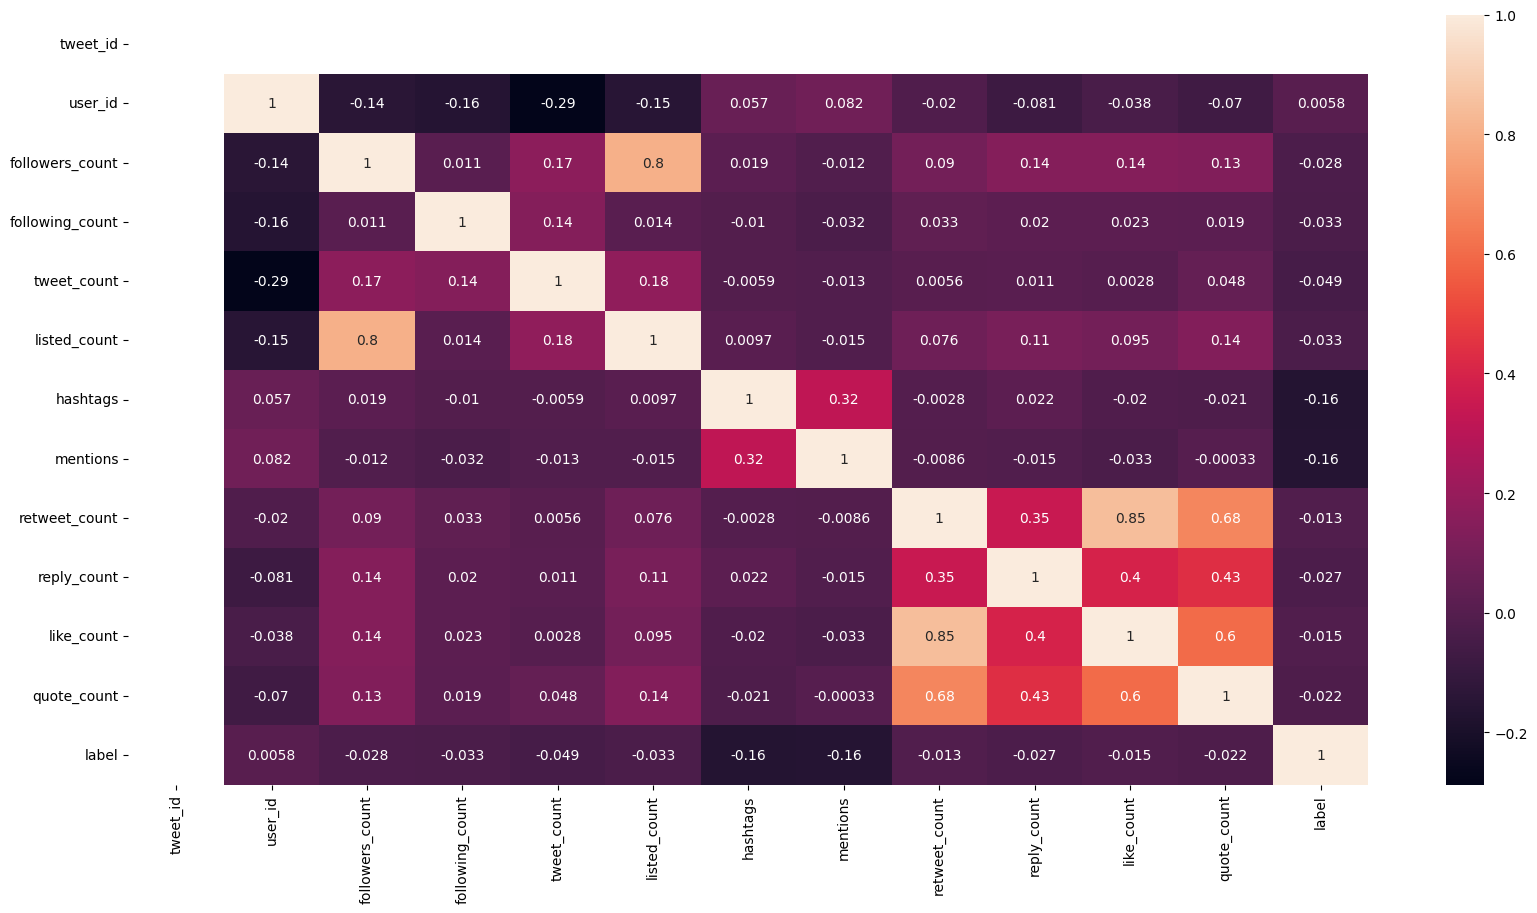

In [4]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(data=dataset.corr(),annot=True)

hashtags and mentions have high correlational value with label.Tweet needs to be broken down and analysed

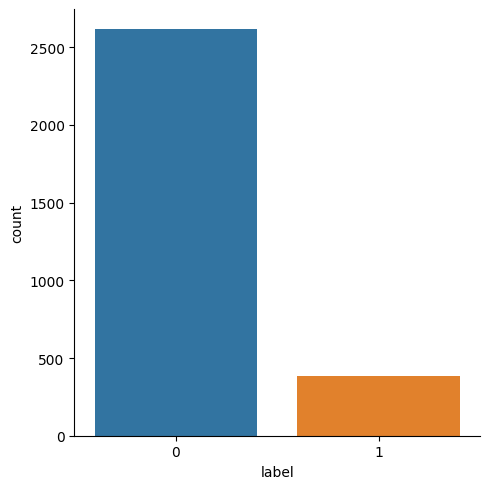

In [5]:
sns.catplot(x='label',data=dataset,kind="count")

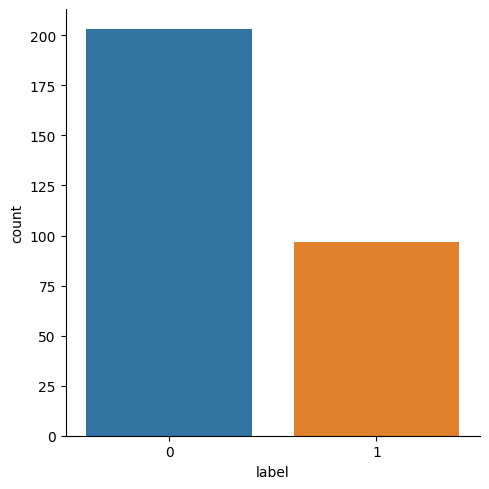

In [6]:
sns.catplot(x='label',data=test_dataset,kind="count")

# Sanitising Input Data #

In [7]:
tweets=[]
test_tweets=[]
#train data
dataset['tweet_text'] = dataset['tweet_text'].str.replace(r"http\S+", "")
dataset['tweet_text'] = dataset['tweet_text'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
#test data
test_dataset['tweet_text'] = test_dataset['tweet_text'].str.replace(r"http\S+", "")
test_dataset['tweet_text'] = test_dataset['tweet_text'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")

C:\Users\Aayush\AppData\Local\Temp\ipykernel_39972\3151881749.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['tweet_text'] = dataset['tweet_text'].str.replace(r"http\S+", "")
C:\Users\Aayush\AppData\Local\Temp\ipykernel_39972\3151881749.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['tweet_text'] = dataset['tweet_text'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
C:\Users\Aayush\AppData\Local\Temp\ipykernel_39972\3151881749.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  test_dataset['tweet_text'] = test_dataset['tweet_text'].str.replace(r"http\S+", "")
C:\Users\Aayush\AppData\Local\Temp\ipykernel_39972\3151881749.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  test_dataset['tweet_text'] = test_dataset['tweet_text'].str.replace(r"[^A-Za-z0-9(),!?@\'\

In [8]:
#Creating lists from sanitised data using the gensim preprocessor
#for training dataset
tweet_text_tokens=dataset.tweet_text.apply(gensim.utils.simple_preprocess)
dataset=dataset.drop('tweet_text',axis=1)
dataset=pd.concat([dataset,tweet_text_tokens],axis=1)
#for test dataset
test_tweet_text_tokens=test_dataset.tweet_text.apply(gensim.utils.simple_preprocess)
test_dataset=test_dataset.drop('tweet_text',axis=1)
test_dataset=pd.concat([test_dataset,test_tweet_text_tokens],axis=1)
dataset.head()

,tweet_id,user_id,followers_count,following_count,tweet_count,listed_count,hashtags,mentions,user_description,retweet_count,reply_count,like_count,quote_count,created_at,label,tweet_text
0,1.540000e+18,1.380000e+18,605,474,6715,6,0,0,i believe in pixy and kingdom supremacy,33,7,123,10,2022-06-15 06:45:26+00:00,1,"[hate, my, life]"
1,1.540000e+18,1.380000e+18,5,1,23148,0,0,0,bot made by @GNCbinary ! I am programmed to re...,0,0,0,0,2022-06-19 03:15:47+00:00,0,"[there, are, notable, differences, between, us..."
2,1.540000e+18,8.050000e+17,4324,4987,3039,30,0,0,author | rep. @MaximusLiterary |\nomnist | Pan...,1,1,8,0,2022-06-17 14:38:49+00:00,1,"[keep, having, this, reoccurring, bad, dream, ..."
3,1.540000e+18,1.380000e+18,7,56,995,0,0,0,loving #StrayKids is undeniable \n👁️👄👁️,0,1,0,0,2022-06-14 18:32:30+00:00,1,"[dont, want, to, make, yall, think, im, seekin..."
4,1.540000e+18,1.420000e+18,2918,4967,10043,3,0,1,I am a happy-go-lucky kind of man. Happy to ch...,0,0,3,0,2022-06-18 19:01:59+00:00,0,"[andyb, ashlea_robyn, people, like, you, dont,..."


# Using Word2Vec to generate features from tweet Texts #

In [9]:
#taking all tokens of text to build vocabulary
total_tokens=pd.concat([dataset['tweet_text'],test_dataset['tweet_text']])

In [10]:
vector_size_wv=10

In [11]:
model = gensim.models.Word2Vec(vector_size=vector_size_wv,window=5,min_count=2,workers=8,seed=0)
model.build_vocab(total_tokens, progress_per=1000)
model.train(total_tokens, total_examples=model.corpus_count, epochs=model.epochs)

(329617, 459085)

In [12]:
#model.save("./word2vec-tweet_text-best.model")

In [13]:
model.wv.most_similar("hate")

[('give', 0.9994118213653564),
 ('lonely', 0.999390184879303),
 ('shit', 0.9992502331733704),
 ('some', 0.9991630911827087),
 ('up', 0.9989628791809082),
 ('man', 0.9989528656005859),
 ('these', 0.9989114999771118),
 ('they', 0.9987803101539612),
 ('does', 0.9987432360649109),
 ('it', 0.9985808730125427)]

In [14]:
vocab=set(model.wv.index_to_key)

# Processing dataset using word2vec #

In [15]:
#making sentence array for train data
sen_array=[]
for ls in dataset['tweet_text']:
    sentence=[]
    for i in ls:
        if i in vocab:
            sentence.append(model.wv[i])
    sentence=np.array(sentence)
    sen_array.append(sentence)
#making sentence array for test data
sen_array_test=[]
for ls in test_dataset['tweet_text']:
    sentence=[]
    for i in ls:
        if i in vocab:
            sentence.append(model.wv[i])
    sentence=np.array(sentence)
    sen_array_test.append(sentence)

In [16]:
#making sentence average vectors for train data
text_vect_avg = []
for v in sen_array:
    if v.size:
        text_vect_avg.append(v.mean(axis=0))
    else:
        text_vect_avg.append(np.zeros(vector_size_wv, dtype=float))# the same vector size must be used here as for model training
#making sentence average vectors for test data
text_vect_avg_test = []
for v in sen_array_test:
    if v.size:
        text_vect_avg_test.append(v.mean(axis=0))
    else:
        text_vect_avg_test.append(np.zeros(vector_size_wv, dtype=float))

In [17]:
dataset["sentence_average"]=text_vect_avg
test_dataset["sentence_average"]=text_vect_avg_test
dataset.head()

,tweet_id,user_id,followers_count,following_count,tweet_count,listed_count,hashtags,mentions,user_description,retweet_count,reply_count,like_count,quote_count,created_at,label,tweet_text,sentence_average
0,1.540000e+18,1.380000e+18,605,474,6715,6,0,0,i believe in pixy and kingdom supremacy,33,7,123,10,2022-06-15 06:45:26+00:00,1,"[hate, my, life]","[-0.0991388, 1.4854579, 0.43941435, -1.4845743..."
1,1.540000e+18,1.380000e+18,5,1,23148,0,0,0,bot made by @GNCbinary ! I am programmed to re...,0,0,0,0,2022-06-19 03:15:47+00:00,0,"[there, are, notable, differences, between, us...","[-0.0050597675, 1.5021739, 0.5700926, -1.27485..."
2,1.540000e+18,8.050000e+17,4324,4987,3039,30,0,0,author | rep. @MaximusLiterary |\nomnist | Pan...,1,1,8,0,2022-06-17 14:38:49+00:00,1,"[keep, having, this, reoccurring, bad, dream, ...","[0.016137423, 1.4062575, 0.5703225, -1.2856216..."
3,1.540000e+18,1.380000e+18,7,56,995,0,0,0,loving #StrayKids is undeniable \n👁️👄👁️,0,1,0,0,2022-06-14 18:32:30+00:00,1,"[dont, want, to, make, yall, think, im, seekin...","[0.039471474, 1.4079696, 0.5665094, -1.2531829..."
4,1.540000e+18,1.420000e+18,2918,4967,10043,3,0,1,I am a happy-go-lucky kind of man. Happy to ch...,0,0,3,0,2022-06-18 19:01:59+00:00,0,"[andyb, ashlea_robyn, people, like, you, dont,...","[-0.0047149765, 1.2920852, 0.46446338, -1.1113..."


In [18]:
col_names=dataset.columns
pos_features=[]
for i in col_names:
    if i in ["hashtags","mentions"]:
        pos_features.append(i)
X=dataset[pos_features]
y=dataset["label"]
test_X=test_dataset[pos_features]
test_y=test_dataset["label"]

In [19]:
#converting the sentence average array to a pd dataframe so each value of array can be a feature
sentence_average_df=pd.DataFrame(text_vect_avg)
sentence_average_df.columns = ['Element_' + str(i+1) for i in range(0, sentence_average_df.shape[1])]
sentence_average_df_test=pd.DataFrame(text_vect_avg_test)
sentence_average_df_test.columns = ['Element_' + str(i+1) for i in range(0, sentence_average_df_test.shape[1])]
sentence_average_df.head()

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10
0,-0.099139,1.485458,0.439414,-1.484574,1.255483,2.194425,-1.892757,-0.984596,0.414807,2.324082
1,-0.005060,1.502174,0.570093,-1.274855,1.192015,1.797653,-1.705449,-0.927338,0.296264,2.011174
2,0.016137,1.406258,0.570323,-1.285622,1.142350,1.768252,-1.623952,-0.906139,0.270449,1.878998
3,0.039471,1.407970,0.566509,-1.253183,1.085094,1.720394,-1.623515,-0.912180,0.270587,1.904948
4,-0.004715,1.292085,0.464463,-1.111302,1.009291,1.617175,-1.464442,-0.788194,0.241310,1.790721


In [20]:
#combining the dataset with sentence average
X=pd.concat([X,sentence_average_df],axis=1)
test_X=pd.concat([test_X,sentence_average_df_test],axis=1)
test_X.head()

,hashtags,mentions,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10
0,0,0,0.025620,1.189094,0.496029,-1.082129,0.934825,1.512865,-1.336875,-0.751988,0.296364,1.649402
1,0,1,-0.001291,0.820084,0.353881,-0.721835,0.656769,1.023141,-0.838480,-0.523909,0.229465,1.119620
2,0,0,0.184132,1.329392,0.527059,-1.205433,0.947222,1.760126,-1.671482,-0.830443,0.178524,1.974254
3,1,0,-0.003415,1.282805,0.463948,-1.171666,1.013751,1.641715,-1.403800,-0.776243,0.276790,1.804312
4,0,0,0.015027,1.414733,0.590492,-1.245141,1.118711,1.793338,-1.812237,-0.983445,0.285739,1.806537


# Using Logistic Regression to predict target variables #

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 0,max_iter=1000)
lr.fit(X,y)
y_pred_lr=lr.predict(test_X)

### Accuracy Metrics ###

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmlr = confusion_matrix(test_y, y_pred_lr)
print(cmlr)
accuracy_score(test_y, y_pred_lr)

[[203   0]
 [ 93   4]]


0.69

# Using enseable learning Methods to predict target variable #

## XGBOOST ##

In [156]:
# Hyper Parameter Optimization using RandomSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "random_state"     : [ 0, 42, 12 , 10],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
from sklearn.model_selection import RandomizedSearchCV
classifierXGB=xgb.XGBClassifier()
random_search=RandomizedSearchCV(classifierXGB,param_distributions=params,scoring='accuracy',cv=5,n_jobs=-1,verbose=3)

In [157]:
random_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'random_state': [0, 42, 12, 10]},
                   scoring='accuracy', verbose=3)

In [158]:
random_search.best_params_

{'random_state': 12,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'colsample_bytree': 0.3}

In [30]:
classifierXGB=xgb.XGBClassifier(min_child_weight=5,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,random_state=0,gamma=0.4)
classifierXGB.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [31]:
y_predXGB=classifierXGB.predict(test_X)
print(y_predXGB)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


## Accuracy Metrics ##

In [32]:
cmXGB = confusion_matrix(test_y, y_predXGB)
print(cmXGB)
accuracy_score(test_y, y_predXGB)

[[200   3]
 [ 81  16]]


0.72

## Bagging Classifier ##

In [33]:
from sklearn.ensemble import BaggingClassifier
classifierBC=BaggingClassifier(n_estimators=10,random_state=0)
classifierBC.fit(X,y)

BaggingClassifier(random_state=0)

In [34]:
y_predBC=classifierBC.predict(test_X)
print(y_predBC)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


## Accuracy Metrics ##

In [35]:
cmBC = confusion_matrix(test_y, y_predBC)
print(cmBC)
accuracy_score(test_y, y_predBC)

[[202   1]
 [ 83  14]]


0.72

## Random Forest ##

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state = 0)
classifierRF.fit(X, y)

RandomForestClassifier(random_state=0)

In [37]:
y_predRF=classifierRF.predict(test_X)
print(y_predRF)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


## Accuracy Metrics ##

In [38]:
cmRF = confusion_matrix(test_y, y_predRF)
print(cmRF)
accuracy_score(test_y, y_predRF)

[[202   1]
 [ 83  14]]


0.72

# Combining datasets and using Cross Validation #

In [39]:
combi_X=pd.concat([X,test_X],axis=0)
combi_y=pd.concat([y,test_y],axis=0)

In [40]:
combi_X.describe()

,hashtags,mentions,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,0.211515,0.176667,0.007805,1.287545,0.500722,-1.156174,1.026429,1.634011,-1.470741,-0.828433,0.270209,1.788619
std,0.408445,0.381444,0.037127,0.231196,0.094990,0.202441,0.182807,0.295085,0.287981,0.148755,0.059709,0.310666
min,0.000000,0.000000,-0.183101,0.000000,-0.019428,-1.943245,0.000000,0.000000,-2.224204,-1.434677,-0.086754,0.000000
25%,0.000000,0.000000,-0.008419,1.189064,0.453657,-1.274208,0.946488,1.506845,-1.644927,-0.915825,0.241619,1.666918
50%,0.000000,0.000000,0.009480,1.320966,0.508300,-1.179776,1.053197,1.671367,-1.504359,-0.846352,0.273076,1.832651
75%,0.000000,0.000000,0.026442,1.425333,0.556462,-1.073445,1.133562,1.804823,-1.336467,-0.763721,0.302108,1.969065
max,1.000000,1.000000,0.241667,2.089388,0.882829,0.000000,1.761109,2.921477,0.023593,0.011642,0.596138,2.979063


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
RF = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
LR=LogisticRegression(random_state = 0,max_iter=1000)
XGB=xgb.XGBClassifier()
RFscores=cross_validate(RF,combi_X,combi_y,scoring="accuracy")
LRscores=cross_validate(LR,combi_X,combi_y,scoring="accuracy")
XGBscores=cross_validate(XGB,combi_X,combi_y,scoring="accuracy")
print(RFscores['test_score'])
print(LRscores['test_score'])
print(XGBscores['test_score'])

[0.86515152 0.86666667 0.88030303 0.87575758 0.85909091]
[0.85606061 0.8530303  0.86515152 0.85151515 0.86212121]
[0.85151515 0.84545455 0.86666667 0.86363636 0.84848485]


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combi_X, combi_y, test_size = 0.20, random_state = 0,shuffle=True)

# Training Logistic Regression on this combined dataset #

In [48]:
lr_combi=LogisticRegression(random_state = 0,max_iter=1000)
lr_combi.fit(X_train,y_train)
y_pred_lr_combi=lr.predict(X_test)

### Accuracy Metrics ###

In [57]:
cmlrcombi = confusion_matrix(y_test, y_pred_lr_combi)
print(cmlrcombi)
accuracy_score(y_test, y_pred_lr_combi)

[[558   1]
 [ 98   3]]


0.85

# Training XGB on this combined dataset #

In [51]:
XGB_2=xgb.XGBClassifier(random_state=0)
XGB_2.fit(X_train,y_train)
y_pred_XGB_2=XGB_2.predict(X_test)
print(y_pred_XGB_2)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Accuracy Metrics ##

In [52]:
cmXGB_2 = confusion_matrix(y_test, y_pred_XGB_2)
print(cmXGB_2)
accuracy_score(y_test, y_pred_XGB_2)

[[535  24]
 [ 88  13]]


0.8303030303030303

# Insights #

1.Higher scores on cross valdiation and training results on combined dataset indicates test dataset might be containing more anomalies
<br>
2.Other enseamble learning methods can be better tuned using grid-search CV
<br>
3.Word2vec uses its vocabulary capabilities to relate data to its contextual meaning by projecting it into a vector space using an ANN.I feel that more data is added this model would perform better as the vocabulary is expanded. However, I could currently achieve a better accuracy on the dataset by using TF-IDF adn have demonstrated the same below.

# Using TF-IDF to analyze the combined dataset #

## Train dataset BOW generation ##

In [218]:
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3000):
    tweet=re.sub('[^a-zA-Z]',' ',str(dataset['tweet_text'][i]))
    tweet=tweet.lower()
    tweet=tweet.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords)]
    tweet=' '.join(tweet)
    corpus.append(tweet)

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000)
new_text=tfidf.fit_transform(corpus).toarray()
print(new_text)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [220]:
# processing user description tags for insight

In [221]:
corpus_desc=[]
for i in range(0,3000):
    desc=re.sub('[^a-zA-Z]',' ',str(dataset['user_description'][i]))
    desc=desc.lower()
    desc=desc.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    desc = [ps.stem(word) for word in desc if not word in set(all_stopwords)]
    desc=' '.join(desc)
    corpus_desc.append(desc)

In [222]:
tfidf_desc=TfidfVectorizer(max_features=1000)
new_text_desc=tfidf_desc.fit_transform(corpus_desc).toarray()
print(new_text_desc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Test dataset BOW generation ##

In [223]:
corpus2=[]
for i in range(0,300):
    tweet=re.sub('[^a-zA-Z]',' ',str(test_dataset['tweet_text'][i]))
    tweet=tweet.lower()
    tweet=tweet.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords)]
    tweet=' '.join(tweet)
    corpus2.append(tweet)


In [224]:
new_text_test=tfidf.transform(corpus2).toarray()
print(new_text_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [225]:
corpus_desc_test=[]
for i in range(0,300):
    desc=re.sub('[^a-zA-Z]',' ',str(test_dataset['user_description'][i]))
    desc=desc.lower()
    desc=desc.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    desc = [ps.stem(word) for word in desc if not word in set(all_stopwords)]
    desc=' '.join(desc)
    corpus_desc_test.append(desc)

In [226]:
new_text_desc_test=tfidf_desc.transform(corpus_desc_test).toarray()
print(new_text_desc_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20891457 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [227]:
tfidf_X=np.append(new_text,new_text_desc,axis=1)
tfidf_y=dataset['label']
tfidf_test_X=np.append(new_text_test,new_text_desc_test,axis=1)
tfidf_test_y=test_dataset['label']
tfidf_combi_X=np.append(tfidf_X,tfidf_test_X,axis=0)
tfidf_combi_y=np.append(tfidf_y,tfidf_test_y,axis=0)

## Logistic Regression ##

In [228]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(tfidf_combi_X, tfidf_combi_y, test_size = 0.20, random_state = 0,shuffle=True)

In [229]:
lr_tfidf=LogisticRegression(random_state = 0,max_iter=1000)
lr_tfidf.fit(X_train_2,y_train_2)
y_lr_tfidf_pred=lr_tfidf.predict(X_test_2)

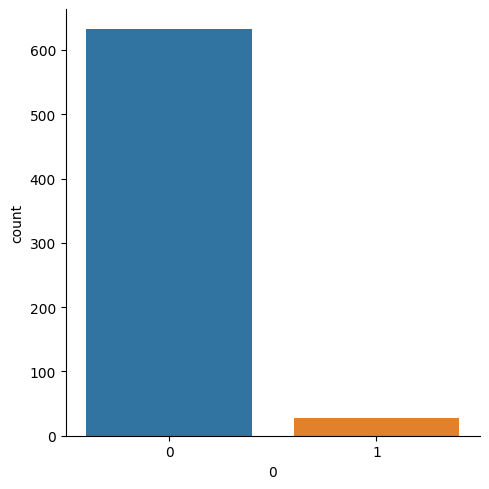

In [230]:
predicted_df=pd.DataFrame(y_lr_tfidf_pred)
sns.catplot(data=predicted_df,x=0,kind="count")

### Accuracy Metrics ###

In [231]:
cmlr_tfidf = confusion_matrix(y_test_2, y_lr_tfidf_pred)
print(cmlr_tfidf)
accuracy_score(y_test_2, y_lr_tfidf_pred)

[[550   9]
 [ 82  19]]


0.8621212121212121

# Future Improvement Possibilities #

1.We can use transformer model to explore more deep learning on the dataset.
<br>
2.Better Word2vec models can be generated as it uses N.N